<h1 align=center><font size = 7>Capstone Project - The Battle of the Neighbourhoods</font></h1> 

<h1 align=center><font size = 7>"Dress to Impress"</font></h1> 

<h2 align=center><font size = 5>Applied Data Science Capstone by IBM</font></h2>

## Table of Contents:

1.  <a href="#item1">Business Problem</a>

2.  <a href="#item2">Data</a>

3.  <a href="#item3">Analysis</a>



<a id='item1'></a>
## Business Problem

Andreea is a vlogger moving to Bucharest, Romania, to follow her dream of opening her own coffee shop. She currently makes her living out of her Youtube and Instagram accounts, making movies about her whereabouts. She is looking to find out which neighbourhood from Bucharest is the most suitable to fit her highly active lifestyle. The neighbourhood should lack too many coffee shops, so that it could embrace her own business. Doing so, she hopes to maximize her chances of success.

The target audience for this project should also be other self-employed people looking for fame and cash-flow generated by their presence in certain places, in the city of Bucharest. Also, people looking to invest in consumer-oriented business should find this study helpful in decided where and why to invest in certain places. 

<a id='item2'></a>
## Data

Based on definition of our problem, factors that will influence our decision are:
- diversity of neighbourhood amenities
- closeness of similar neighbourhoods
- number of existing coffee shops in the neighbourhood

The data used for this report are sourced using the following:
- Wikipedia page to identify all Neighbourhoods in Bucharest, Romania: https://en.wikipedia.org/wiki/Category:Districts_of_Bucharest
- Foursquare API to find amenities and their type and location in every neighbourhood from Bucharest
- Google Maps API geocoding to locate the neighbourhoods


<a id='item3'></a>
## Analysis

In [101]:
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import requests
!pip install lxml 
!pip install folium
import folium
from sklearn.cluster import KMeans
import random
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

### Importing Neighbourhoods in Bucharest from Wikipedia using BeautifulSoup

In [102]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Districts_of_Bucharest').text 
soup = BeautifulSoup(source, 'lxml')

In [103]:
csv_file = open('bucharest.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [104]:
mwcg = soup.find_all(class_ = "mw-category-group")
length = len(mwcg) 
for i in range(1, length): 
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title')
        csv_writer.writerow([nbd])

In [105]:
csv_file.close()

In [106]:
df = pd.read_csv('bucharest.csv')

In [107]:
df.shape

(39, 1)

In [108]:
df.head()

,Neighbourhood
0,"Băneasa, Bucharest"
1,"Berceni, Bucharest"
2,Bucureștii Noi
3,Centrul Civic
4,"Colentina, Bucharest"


In [109]:
df['Neighbourhood'] = df.Neighbourhood.str.replace(', Bucharest,?' , '')

In [110]:
df.head()

,Neighbourhood
0,Băneasa
1,Berceni
2,Bucureștii Noi
3,Centrul Civic
4,Colentina


### Adding Latitude and Longitude using Google Geocode API

In [111]:
# The code was removed by Watson Studio for sharing.

In [112]:
import requests
import json


latitudes = []
longitudes = []
distance = []

for nbd in df["Neighbourhood"] : 
    address = nbd + ", Bucharest,Romania"
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}'.format(address, google_api_key)
    obj = json.loads(requests.get(url).text)
    
    results = obj['results']
    lat = results[0]['geometry']['location']['lat']
    lng = results[0]['geometry']['location']['lng']

    latitudes.append(lat)
    longitudes.append(lng)


In [113]:
df['Latitude'] = latitudes
df['Longitude'] = longitudes

In [114]:
df.head()

,Neighbourhood,Latitude,Longitude
0,Băneasa,44.493726,26.076048
1,Berceni,44.389221,26.118203
2,Bucureștii Noi,44.493619,26.031081
3,Centrul Civic,44.427285,26.092441
4,Colentina,44.465766,26.148647


### Map of Bucharest's Neighbourhoods

In [115]:
from geopy.geocoders import Nominatim
address = 'Bucharest, Romania'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [116]:
map_bucharest = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bucharest)  
    
map_bucharest

### Using Foursquare to get the venues from Bucharest

In [208]:
# The code was removed by Watson Studio for sharing.

In [333]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
   
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [334]:
bucharest_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Băneasa
Berceni
Bucureștii Noi
Centrul Civic
Colentina
Cotroceni
Crângași
Dămăroaia
Dealul Spirii
Dorobanți
Dristor
Drumul Taberei
Dudești
Ferentari
Floreasca
Fundeni
Ghencea
Giulești
Grivița
Iancului
Lipscani
Militari
Moșilor
Obor
Odăi
Olteniței
Pantelimon
Pipera
Primăverii
Progresul
Rahova
Regie
Tineretului
13 Septembrie
Giurgiului
Tei
Titan
Văcărești
Vitan


In [337]:
print(bucharest_venues.shape)
bucharest_venues.head()

(308, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Băneasa,44.493726,26.076048,Pizzeria Capricciosa,44.495738,26.077086,Pizza Place
1,Băneasa,44.493726,26.076048,La Jar,44.495109,26.078031,Theme Restaurant
2,Băneasa,44.493726,26.076048,Pasajul Băneasa,44.494556,26.079360,Tunnel
3,Băneasa,44.493726,26.076048,Părculeț,44.494508,26.076944,Park
4,Băneasa,44.493726,26.076048,La Boeru,44.493170,26.078858,Restaurant


In [338]:
bucharest_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
13 Septembrie,5,5,5,5,5,5
Berceni,5,5,5,5,5,5
Bucureștii Noi,4,4,4,4,4,4
Băneasa,8,8,8,8,8,8
Centrul Civic,9,9,9,9,9,9
Colentina,6,6,6,6,6,6
Cotroceni,7,7,7,7,7,7
Crângași,9,9,9,9,9,9
Dealul Spirii,3,3,3,3,3,3


In [339]:
bc_venues=bucharest_venues.Neighbourhood.value_counts()
bc_venues

Lipscani          30
Dorobanți         30
Regie             18
Dudești           15
Iancului          13
Obor              13
Văcărești         12
Dristor           12
Primăverii        12
Olteniței         11
Moșilor           11
Tineretului       10
Crângași           9
Centrul Civic      9
Giulești           8
Drumul Taberei     8
Băneasa            8
Giurgiului         7
Cotroceni          7
Floreasca          7
Colentina          6
Ghencea            6
Tei                5
13 Septembrie      5
Berceni            5
Vitan              5
Militari           4
Bucureștii Noi     4
Ferentari          4
Pantelimon         4
Fundeni            3
Dealul Spirii      3
Titan              2
Dămăroaia          1
Odăi               1
Name: Neighbourhood, dtype: int64

In [340]:
import matplotlib as mpl
import matplotlib.pyplot as plt

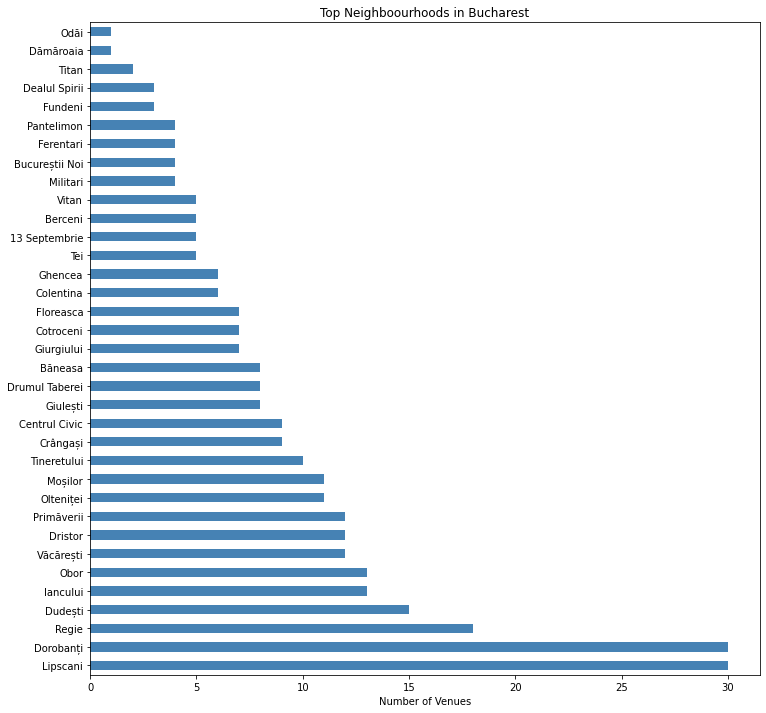

In [341]:
bc_venues.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Venues')
plt.title('Top Neighboourhoods in Bucharest')
plt.show()

In [342]:
bucharest_venues.groupby(['Neighbourhood'])['Venue Category'].value_counts(normalize=True)

Neighbourhood  Venue Category              
13 Septembrie  Department Store                0.200000
               Indian Restaurant               0.200000
               Pizza Place                     0.200000
               Plaza                           0.200000
               Romanian Restaurant             0.200000
                                                 ...   
Văcărești      Pizza Place                     0.083333
               Pool                            0.083333
               Soccer Field                    0.083333
               Tennis Stadium                  0.083333
               Theme Park Ride / Attraction    0.083333
Name: Venue Category, Length: 273, dtype: float64

In [344]:
print('There are {} uniques categories.'.format(len(bucharest_venues['Venue Category'].unique())))

There are 110 uniques categories.


### Analyzing each Neighbourhood

In [345]:

bucharest_onehot = pd.concat([bucharest_venues['Neighbourhood'],pd.get_dummies(bucharest_venues['Venue Category'])], axis=1)
print(bucharest_onehot.shape)
bucharest_onehot.head()


(308, 111)


,Neighbourhood,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,...,Taco Place,Tea Room,Tennis Stadium,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tunnel,Vegetarian / Vegan Restaurant,Wine Bar
0,Băneasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Băneasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Băneasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Băneasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Băneasa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [346]:
bucharest_grouped = bucharest_onehot.groupby('Neighbourhood').mean().reset_index()
bucharest_grouped

,Neighbourhood,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,...,Taco Place,Tea Room,Tennis Stadium,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Tunnel,Vegetarian / Vegan Restaurant,Wine Bar
0,13 Septembrie,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000
1,Berceni,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000
2,Bucureștii Noi,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000
3,Băneasa,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.125,0.000000,0.000000
4,Centrul Civic,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000,0.000,0.000000,0.000000
5,Colentina,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000
6,Cotroceni,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000
7,Crângași,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000
8,Dealul Spirii,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000
9,Dorobanți,0.000000,0.000000,0.033333,0.000000,0.0,0.000000,0.000000,0.066667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.033333,0.033333


### Top Neighbourhood/venue

In [347]:
num_top_venues = 1

for hood in bucharest_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = bucharest_grouped[bucharest_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----13 Septembrie----
               venue  freq
0  Indian Restaurant   0.2


----Berceni----
                 venue  freq
0  Lebanese Restaurant   0.2


----Bucureștii Noi----
          venue  freq
0  Dessert Shop  0.25


----Băneasa----
  venue  freq
0  Café  0.25


----Centrul Civic----
        venue  freq
0  Restaurant  0.22


----Colentina----
                 venue  freq
0  Rental Car Location  0.17


----Cotroceni----
    venue  freq
0  Market  0.14


----Crângași----
           venue  freq
0  Grocery Store  0.22


----Dealul Spirii----
        venue  freq
0  Art Museum  0.33


----Dorobanți----
  venue  freq
0  Café   0.1


----Dristor----
         venue  freq
0  Supermarket  0.25


----Drumul Taberei----
        venue  freq
0  Restaurant  0.25


----Dudești----
  venue  freq
0  Café   0.2


----Dămăroaia----
         venue  freq
0  Supermarket   1.0


----Ferentari----
  venue  freq
0  Park  0.25


----Floreasca----
  venue  freq
0  Pool  0.29


----Fundeni----
        venue  

### Putting into Pandas framework

In [348]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [349]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = bucharest_grouped['Neighbourhood']

for ind in np.arange(bucharest_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bucharest_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,13 Septembrie,Romanian Restaurant,Indian Restaurant,Plaza,Pizza Place,Department Store
1,Berceni,Pub,Lebanese Restaurant,Bakery,Cheese Shop,Fountain
2,Bucureștii Noi,Dessert Shop,Gym,Bakery,Supermarket,Fried Chicken Joint
3,Băneasa,Café,Restaurant,Tunnel,Theme Restaurant,Pizza Place
4,Centrul Civic,Restaurant,Theater,Romanian Restaurant,Clothing Store,Chocolate Shop


### Cluster Neighbourhoods

In [350]:
kclusters = 5
bucharest_grouped_clustering = bucharest_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bucharest_grouped_clustering)

kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [351]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bucharest_merged = df

bucharest_merged = bucharest_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')


In [393]:
bucharest_merged.tail()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
34,Giurgiului,44.389770,26.093142,0.0,Playground,Pizza Place,Sandwich Place,Electronics Store,Supermarket
35,Tei,44.459806,26.118913,0.0,Restaurant,Doner Restaurant,Italian Restaurant,Electronics Store,Bar
36,Titan,44.420545,26.158415,0.0,Restaurant,Park,IT Services,Dessert Shop,Doner Restaurant
37,Văcărești,44.404109,26.114987,0.0,Italian Restaurant,Pool,Gym Pool,Soccer Field,Theme Park Ride / Attraction
38,Vitan,44.410508,26.129060,0.0,Cosmetics Shop,Auto Dealership,Electronics Store,Metro Station,Bus Station


In [353]:
bucharest_grouped_clustering = bucharest_grouped.drop('Neighbourhood', 1)

### Using K-means clustering

In [354]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [355]:
max_range = 10

In [356]:
### silhouette analysis  seeks to define the dissimilarity of clusters which means its a measure of how close each point in one cluster is to points in the neighboring clusters.
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :

    bgc = bucharest_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(bgc)
    
    score = silhouette_score(bgc, kmeans)
    
    indices.append(kclusters)
    scores.append(score)

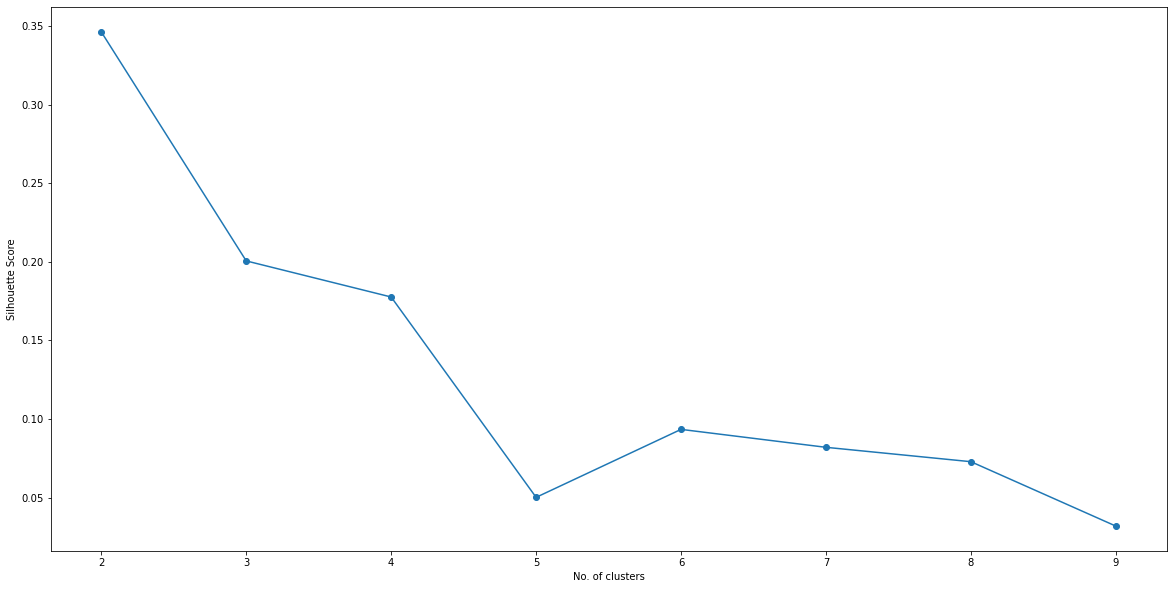

In [357]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [358]:
opt = np.argmax(scores) + 2
print(opt)

2


### K-means for optimal number of clustering

In [359]:
kclusters = opt
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(bucharest_grouped_clustering)

In [360]:
neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)

In [361]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [362]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,13 Septembrie,Romanian Restaurant,Indian Restaurant,Plaza,Pizza Place,Department Store
1,0,Berceni,Pub,Lebanese Restaurant,Bakery,Cheese Shop,Fountain
2,0,Bucureștii Noi,Dessert Shop,Gym,Bakery,Supermarket,Fried Chicken Joint
3,0,Băneasa,Café,Restaurant,Tunnel,Theme Restaurant,Pizza Place
4,0,Centrul Civic,Restaurant,Theater,Romanian Restaurant,Clothing Store,Chocolate Shop


In [363]:
bucharest_merged = df

bucharest_merged = bucharest_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

In [364]:
print(bucharest_merged['Cluster Labels'].isnull().sum())
bucharest_merged.shape

4


(39, 9)

In [365]:
bucharest_merged.dropna(axis=0, inplace=True)
bucharest_merged.shape

(35, 9)

In [366]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(bucharest_merged['Latitude'], bucharest_merged['Longitude'], bucharest_merged['Neighbourhood'], bucharest_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [367]:
bucharest_merged.head(10)

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Băneasa,44.493726,26.076048,0.0,Café,Restaurant,Tunnel,Theme Restaurant,Pizza Place
1,Berceni,44.389221,26.118203,0.0,Pub,Lebanese Restaurant,Bakery,Cheese Shop,Fountain
2,Bucureștii Noi,44.493619,26.031081,0.0,Dessert Shop,Gym,Bakery,Supermarket,Fried Chicken Joint
3,Centrul Civic,44.427285,26.092441,0.0,Restaurant,Theater,Romanian Restaurant,Clothing Store,Chocolate Shop
4,Colentina,44.465766,26.148647,0.0,Rental Car Location,Spa,Hotel,Eastern European Restaurant,Park
5,Cotroceni,44.429874,26.070091,0.0,Bistro,Pedestrian Plaza,Park,Tea Room,Market
6,Crângași,44.455002,26.047913,0.0,Grocery Store,Fried Chicken Joint,Gym / Fitness Center,Gym,Pizza Place
7,Dămăroaia,44.491447,26.060160,1.0,Supermarket,Wine Bar,Fried Chicken Joint,Dessert Shop,Doner Restaurant
8,Dealul Spirii,44.428385,26.085606,0.0,Art Museum,Gym,Café,Fried Chicken Joint,Doner Restaurant
9,Dorobanți,44.459076,26.096738,0.0,Sushi Restaurant,Café,Bakery,Restaurant,Vegetarian / Vegan Restaurant


In [368]:
bucharest_merged['Cluster Labels'].value_counts()

0.0    33
1.0     2
Name: Cluster Labels, dtype: int64

In [369]:
venues0 = bucharest_merged.loc[bucharest_merged['Cluster Labels'] == 0].reset_index().drop(['index'],axis=1)
venues0

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Băneasa,44.493726,26.076048,0.0,Café,Restaurant,Tunnel,Theme Restaurant,Pizza Place
1,Berceni,44.389221,26.118203,0.0,Pub,Lebanese Restaurant,Bakery,Cheese Shop,Fountain
2,Bucureștii Noi,44.493619,26.031081,0.0,Dessert Shop,Gym,Bakery,Supermarket,Fried Chicken Joint
3,Centrul Civic,44.427285,26.092441,0.0,Restaurant,Theater,Romanian Restaurant,Clothing Store,Chocolate Shop
4,Colentina,44.465766,26.148647,0.0,Rental Car Location,Spa,Hotel,Eastern European Restaurant,Park
5,Cotroceni,44.429874,26.070091,0.0,Bistro,Pedestrian Plaza,Park,Tea Room,Market
6,Crângași,44.455002,26.047913,0.0,Grocery Store,Fried Chicken Joint,Gym / Fitness Center,Gym,Pizza Place
7,Dealul Spirii,44.428385,26.085606,0.0,Art Museum,Gym,Café,Fried Chicken Joint,Doner Restaurant
8,Dorobanți,44.459076,26.096738,0.0,Sushi Restaurant,Café,Bakery,Restaurant,Vegetarian / Vegan Restaurant
9,Dristor,44.418284,26.142541,0.0,Supermarket,Restaurant,Drugstore,Pizza Place,Gym


In [370]:
venues1 = bucharest_merged.loc[bucharest_merged['Cluster Labels'] == 1].reset_index().drop(['index'],axis=1)
venues1

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Dămăroaia,44.491447,26.060160,1.0,Supermarket,Wine Bar,Fried Chicken Joint,Dessert Shop,Doner Restaurant
1,Pantelimon,44.444697,26.170441,1.0,Supermarket,Park,Sports Club,Wine Bar,French Restaurant


In [372]:
venues0.shape

(33, 9)

### Dropping Neighbourhoods that have "Cafe" listed in top 5 Venues

In [373]:
venues0a = venues0[venues0['1st Most Common Venue'] != 'Café']

In [374]:
venues0a = venues0a[venues0a['2nd Most Common Venue'] != 'Café']

In [375]:
venues0a = venues0a[venues0a['3rd Most Common Venue'] != 'Café']

In [376]:
venues0a = venues0a[venues0a['4th Most Common Venue'] != 'Café']

In [377]:
venues0a = venues0a[venues0a['5th Most Common Venue'] != 'Café']

In [378]:
venues0a.shape

(27, 9)

In [379]:
venues0a.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Berceni,44.389221,26.118203,0.0,Pub,Lebanese Restaurant,Bakery,Cheese Shop,Fountain
2,Bucureștii Noi,44.493619,26.031081,0.0,Dessert Shop,Gym,Bakery,Supermarket,Fried Chicken Joint
3,Centrul Civic,44.427285,26.092441,0.0,Restaurant,Theater,Romanian Restaurant,Clothing Store,Chocolate Shop
4,Colentina,44.465766,26.148647,0.0,Rental Car Location,Spa,Hotel,Eastern European Restaurant,Park
5,Cotroceni,44.429874,26.070091,0.0,Bistro,Pedestrian Plaza,Park,Tea Room,Market


In [380]:
venues0a['1st Most Common Venue'].value_counts()

Restaurant                     5
Bistro                         2
Bus Station                    2
Pub                            2
Gym                            1
Pool                           1
Italian Restaurant             1
Sports Bar                     1
Rental Car Location            1
Supermarket                    1
Romanian Restaurant            1
Sporting Goods Shop            1
Grocery Store                  1
Eastern European Restaurant    1
Playground                     1
Cosmetics Shop                 1
Greek Restaurant               1
IT Services                    1
Dessert Shop                   1
Department Store               1
Name: 1st Most Common Venue, dtype: int64

### Choosing Neighbourhood that has Restaurant as Most Common Venue

In [381]:
venues=venues0a.loc[venues0a['1st Most Common Venue'] == 'Restaurant'].reset_index().drop(['index'],axis=1)
venues

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Centrul Civic,44.427285,26.092441,0.0,Restaurant,Theater,Romanian Restaurant,Clothing Store,Chocolate Shop
1,Drumul Taberei,44.421340,26.034485,0.0,Restaurant,Grocery Store,Farmers Market,Park,Skating Rink
2,Fundeni,44.463675,26.173474,0.0,Restaurant,Bar,Wine Bar,Fried Chicken Joint,Dessert Shop
3,Tei,44.459806,26.118913,0.0,Restaurant,Doner Restaurant,Italian Restaurant,Electronics Store,Bar
4,Titan,44.420545,26.158415,0.0,Restaurant,Park,IT Services,Dessert Shop,Doner Restaurant


### Prices/sqm using information from 
https://www.wall-street.ro/articol/Money/233510/imobiliare-ro-pretul-unei-locuinte-in-cartierele-ieftine-din-bucuresti.html

In [382]:
dict={'Neighbourhood':['Kiseleff','Aviatorilor','Herăstrau','Nordului','Dorobanți','Floreasca','Aviației','Unirii','Drumul Taberei','Giurgiului','Giulesti','Rahova','Ghencea'],'Price/sqm':[2580,2580,2410,2410,1990,1990,1870,1720,1050,1040,950,940,940
]}

In [387]:
df_price=pd.DataFrame(dict)
df_price.head()

,Neighbourhood,Price/sqm
0,Kiseleff,2580
1,Aviatorilor,2580
2,Herăstrau,2410
3,Nordului,2410
4,Dorobanți,1990


In [388]:
df_price = df_price.join(bucharest_merged.set_index('Neighbourhood'), on='Neighbourhood')

In [389]:
df_price.head(20)

,Neighbourhood,Price/sqm,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Kiseleff,2580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aviatorilor,2580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Herăstrau,2410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nordului,2410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dorobanți,1990,44.459076,26.096738,0.0,Sushi Restaurant,Café,Bakery,Restaurant,Vegetarian / Vegan Restaurant
5,Floreasca,1990,44.466539,26.102152,0.0,Pool,Hotel,French Restaurant,Eastern European Restaurant,Lounge
6,Aviației,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Unirii,1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Drumul Taberei,1050,44.421340,26.034485,0.0,Restaurant,Grocery Store,Farmers Market,Park,Skating Rink
9,Giurgiului,1040,44.389770,26.093142,0.0,Playground,Pizza Place,Sandwich Place,Electronics Store,Supermarket
